[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter text for detailed analysis: space contains stars and galaxies

🔍 **In-depth Analysis:**
Seven Moments (Mean, Variance, Skewness, Kurtosis, Std Dev, Median, Mode): [np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.int64(1)]
Lexical Diversity: 1.00
Average Sentence Length: 5.00
Complex Words: contains, galaxies
Readability Score (Approx): 54.80

Token Frequency Distribution:
space: 1
contains: 1
stars: 1
and: 1
galaxies: 1

🧠 Predicted Topic Category: sci.space


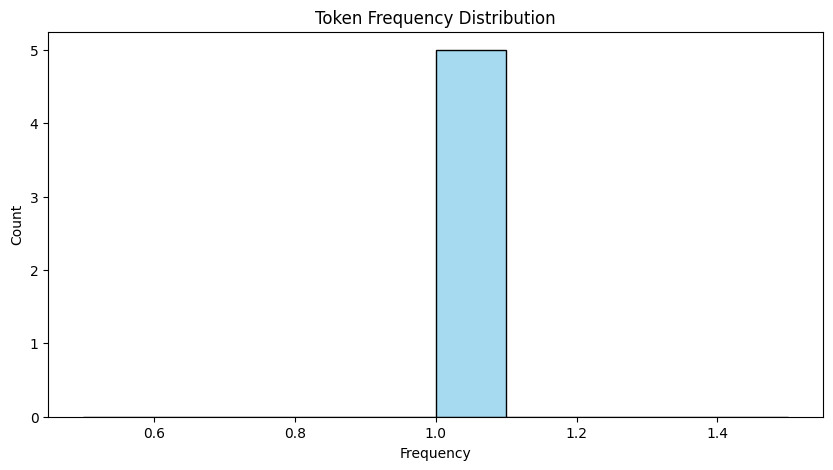

In [2]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups

nltk.download('punkt')
nltk.download('punkt_tab')
# Calculate Seven Statistical Moments
def calculate_moments(freq_values):
    if not freq_values:
        return [0] * 7
    mean = np.mean(freq_values)
    variance = np.var(freq_values)
    skewness = pd.Series(freq_values).skew()
    kurtosis = pd.Series(freq_values).kurt()
    std_dev = np.std(freq_values)
    median = np.median(freq_values)
    mode = pd.Series(freq_values).mode()[0] if not pd.Series(freq_values).mode().empty else 0
    return [mean, variance, skewness, kurtosis, std_dev, median, mode]

# Feature Extraction from Text
def extract_features(text):
    tokens = word_tokenize(text.lower())
    freq_dist = FreqDist(tokens)
    freq_values = list(freq_dist.values())
    moments = calculate_moments(freq_values)

    # Lexical Analysis
    unique_tokens = set(tokens)
    lexical_diversity = len(unique_tokens) / len(tokens) if tokens else 0
    sentence_count = len(sent_tokenize(text))
    avg_sentence_length = len(tokens) / sentence_count if sentence_count > 0 else 0

    # Complex Words Analysis (length > 6)
    complex_words = [word for word in tokens if len(word) > 6]

    # Readability Analysis
    readability_score = (0.39 * (len(tokens) / sentence_count) + 11.8 * (sum(len(word) for word in tokens) / len(tokens)) - 15.59) if sentence_count > 0 and tokens else 0

    return {
        "Moments": moments,
        "Lexical Diversity": lexical_diversity,
        "Avg Sentence Length": avg_sentence_length,
        "Complex Words": complex_words,
        "Readability Score": readability_score,
        "Token Frequency": freq_dist
    }

# Text Classification Setup
categories = ['rec.sport.hockey', 'sci.space', 'talk.politics.misc']
news_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

def extract_features_for_classification(text):
    tokens = word_tokenize(text.lower())
    freq_dist = FreqDist(tokens)
    freq_values = list(freq_dist.values())
    return calculate_moments(freq_values)

feature_matrix = np.array([extract_features_for_classification(doc) for doc in news_data.data])
labels = news_data.target

# Handle NaN values
feature_matrix = np.nan_to_num(feature_matrix)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.3, random_state=42)

# Model Training
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)

# User Input Analysis
user_text = input("Enter text for detailed analysis: ")
analysis = extract_features(user_text)

# Display Analysis
print("\n🔍 **In-depth Analysis:**")
print(f"Seven Moments (Mean, Variance, Skewness, Kurtosis, Std Dev, Median, Mode): {analysis['Moments']}")
print(f"Lexical Diversity: {analysis['Lexical Diversity']:.2f}")
print(f"Average Sentence Length: {analysis['Avg Sentence Length']:.2f}")
print(f"Complex Words: {', '.join(analysis['Complex Words'])}")
print(f"Readability Score (Approx): {analysis['Readability Score']:.2f}")

# Token Frequency Distribution
print("\nToken Frequency Distribution:")
for token, freq in analysis['Token Frequency'].most_common(10):
    print(f"{token}: {freq}")

# Text Classification
user_features = np.array(extract_features_for_classification(user_text)).reshape(1, -1)
predicted_category = classifier.predict(user_features)
print(f"\n🧠 Predicted Topic Category: {categories[predicted_category[0]]}")

# Visualization: Frequency Distribution
plt.figure(figsize=(10, 5))
sns.histplot(list(analysis['Token Frequency'].values()), bins=10, color='skyblue')
plt.title("Token Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()


In [1]:
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


🔎 Enter your text for an advanced NLP analysis:
the stars and space are great very very great


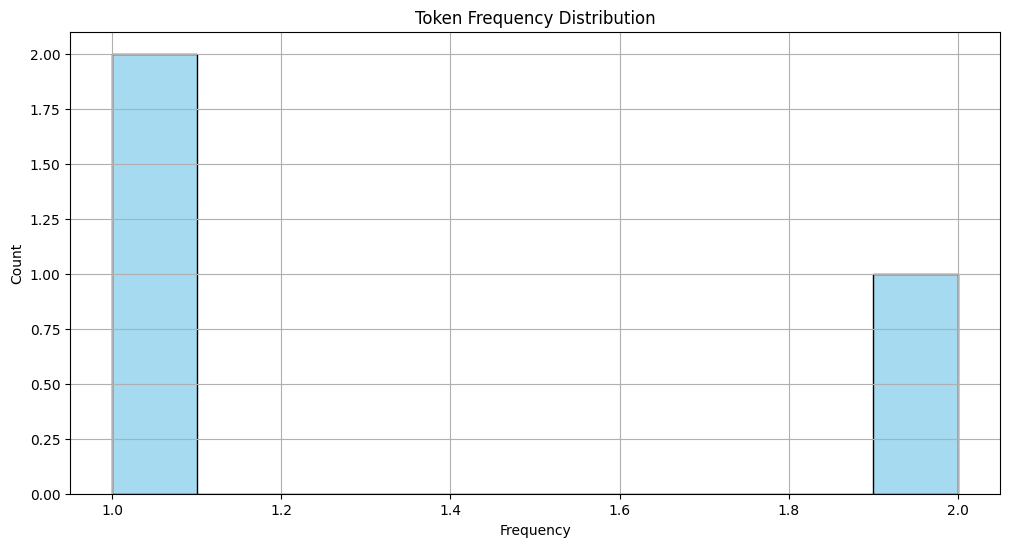

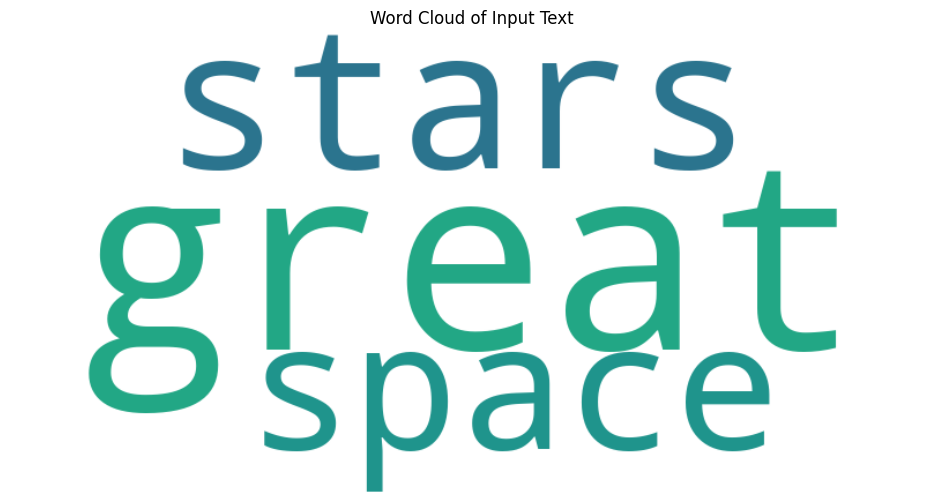

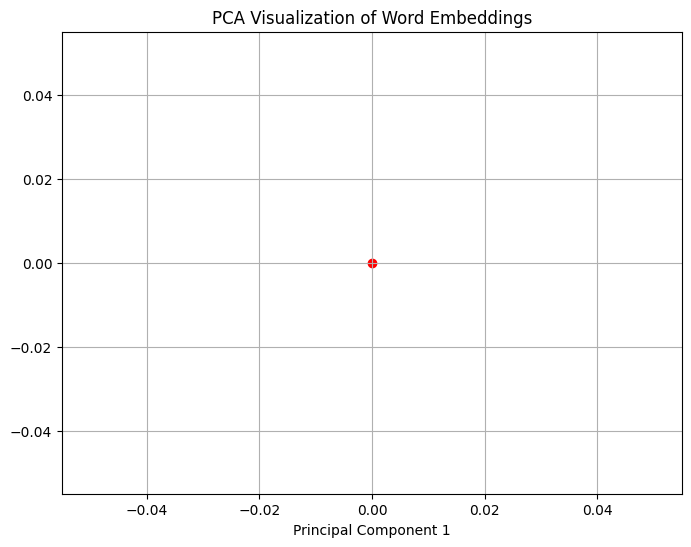

In [9]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag, ne_chunk
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import string
import warnings
warnings.filterwarnings("ignore")

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def expert_text_analysis():
    print("🔎 Enter your text for an advanced NLP analysis:")
    text = input()

    # Tokenization and Cleaning
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in string.punctuation]

    # Frequency Distribution
    freq_dist = FreqDist(tokens)
    freq_values = list(freq_dist.values())

    # Advanced Statistical Moments
    mean_freq = np.mean(freq_values) if freq_values else 0
    variance_freq = np.var(freq_values) if freq_values else 0
    skewness = pd.Series(freq_values).skew() if len(freq_values) > 1 else 0
    kurtosis = pd.Series(freq_values).kurtosis() if len(freq_values) > 1 else 0

    # Sentiment Analysis
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)

    # Named Entity Recognition (NER) and Dependency Parsing
    doc = nlp(text)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]

    # Topic Modeling using LDA
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=5)
    topics = lda_model.print_topics()

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text])
    tfidf_scores = pd.DataFrame(tfidf_matrix.T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
    tfidf_top = tfidf_scores.sort_values(by="TF-IDF", ascending=False).head(10)

    # Word Embedding with PCA - Adjusted for single sample
    tfidf_dense = tfidf_matrix.toarray()

    # If there's only one sample, set n_components to the number of features (or 1 if features are less)
    n_components = min(tfidf_dense.shape[1],1)
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(tfidf_dense)


    # Lexical Diversity
    lexical_diversity = len(set(tokens)) / len(tokens) if tokens else 0

    # Visualization - Frequency Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(freq_values, bins=10, color='skyblue')
    plt.title("Token Frequency Distribution")
    plt.xlabel("Frequency")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

    # Visualization - Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Input Text")
    plt.show()

    # Visualization - PCA Word Embeddings
    plt.figure(figsize=(8, 6))

    # Check if PCA resulted in any components
    if pca_result.shape[1] > 0:
        # If there is at least one component, plot it
        plt.scatter(pca_result[:, 0], [0] * len(pca_result), c='red', marker='o')
        plt.xlabel("Principal Component 1")
    else:
        # If no components were extracted, display a message
        plt.text(0.5, 0.5, "No Principal Components Extracted", ha='center', va='center')

    plt.title("PCA Visualization of Word Embeddings")
    plt.ylabel("")  # Removing y-axis label
    plt.grid(True)
    plt.show()

    # ... (rest of the code remains the same)

expert_text_analysis()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


🔎 Enter your text for an advanced NLP analysis:
"Win! Win! Win! The grand prize! The ultimate prize! The once-in-a-lifetime prize! Win now, win big, win fast! Exclusive! Exclusive! Exclusive! Don't miss out! Limited time! Act now! Now! Now! WIN! WIN! WIN!"


Skipping PCA: Only one sample provided. PCA with n_components > 1 requires more than one sample.


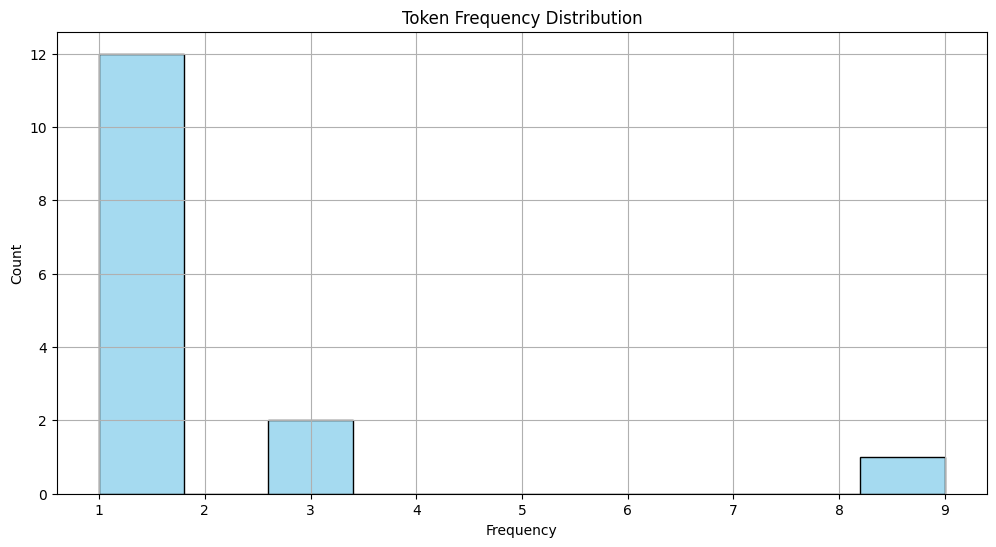

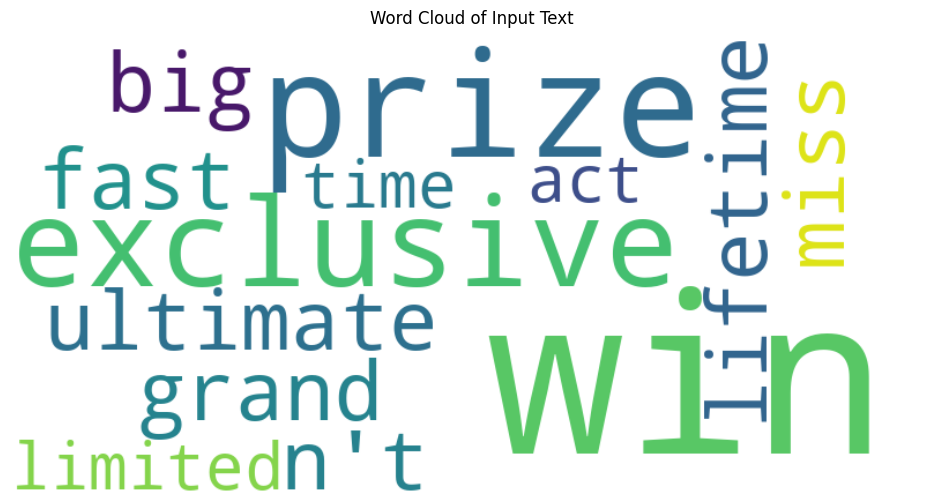


🧠 **Expert-Level Text Analysis Summary:**
Total Tokens: 27
Unique Tokens: 15
Lexical Diversity: 0.5556
Mean Frequency: 1.80
Variance of Frequency: 4.16
Skewness: 3.25
Kurtosis: 11.15

🔹 **Sentiment Analysis:**
Positive: 0.77, Neutral: 0.23, Negative: 0.00, Compound: 0.99

🔹 **Named Entities Identified:**
WIN (ORG)
WIN (ORG)
WIN (ORG)

🔹 **Dependency Parsing:**
" -> punct (Win)
Win -> ROOT (Win)
! -> punct (Win)
Win -> ROOT (Win)
! -> punct (Win)
Win -> ROOT (Win)
! -> punct (Win)
The -> det (prize)
grand -> amod (prize)
prize -> ROOT (prize)

🔹 **Top 10 TF-IDF Tokens:**
             TF-IDF
win        0.768922
now        0.341743
prize      0.256307
the        0.256307
exclusive  0.256307
act        0.085436
big        0.085436
don        0.085436
fast       0.085436
grand      0.085436

🔹 **LDA Topic Modeling (Top Words):**
Topic 0: 0.074*"win" + 0.070*"exclusive" + 0.067*"prize" + 0.066*"fast" + 0.066*"``" + 0.066*"''" + 0.066*"ultimate" + 0.066*"act" + 0.066*"big" + 0.066*"time"
Top

In [6]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag, ne_chunk
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import string
import warnings
warnings.filterwarnings("ignore")

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def expert_text_analysis():
    print("🔎 Enter your text for an advanced NLP analysis:")
    text = input()

    # Tokenization and Cleaning
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in string.punctuation]

    # Frequency Distribution
    freq_dist = FreqDist(tokens)
    freq_values = list(freq_dist.values())

    # Advanced Statistical Moments
    mean_freq = np.mean(freq_values) if freq_values else 0
    variance_freq = np.var(freq_values) if freq_values else 0
    skewness = pd.Series(freq_values).skew() if len(freq_values) > 1 else 0
    kurtosis = pd.Series(freq_values).kurtosis() if len(freq_values) > 1 else 0

    # Sentiment Analysis
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)

    # Named Entity Recognition (NER) and Dependency Parsing
    doc = nlp(text)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]

    # Topic Modeling using LDA
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=5)
    topics = lda_model.print_topics()

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text])
    tfidf_scores = pd.DataFrame(tfidf_matrix.T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
    tfidf_top = tfidf_scores.sort_values(by="TF-IDF", ascending=False).head(10)

    # Word Embedding with PCA - Adjusted for single sample
    # If you have only one sample, PCA with n_components > 1 doesn't make sense.
    # We'll skip PCA in this case.
    if tfidf_matrix.shape[0] > 1:  # Check if there's more than one sample
        tfidf_dense = tfidf_matrix.toarray()
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(tfidf_dense)
    else:
        print("Skipping PCA: Only one sample provided. PCA with n_components > 1 requires more than one sample.")
        pca_result = None  # Or handle this case differently

    # Lexical Diversity
    lexical_diversity = len(set(tokens)) / len(tokens) if tokens else 0

    # Visualization - Frequency Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(freq_values, bins=10, color='skyblue')
    plt.title("Token Frequency Distribution")
    plt.xlabel("Frequency")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

    # Visualization - Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Input Text")
    plt.show()

    # Visualization - PCA Word Embeddings (only if PCA was performed)
    if pca_result is not None:
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c='red', marker='o')
        plt.title("PCA Visualization of Word Embeddings")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.grid(True)
        plt.show()

    # Displaying Advanced Analysis Results
    print("\n🧠 **Expert-Level Text Analysis Summary:**")
    print(f"Total Tokens: {len(tokens)}")
    print(f"Unique Tokens: {len(set(tokens))}")
    print(f"Lexical Diversity: {lexical_diversity:.4f}")
    print(f"Mean Frequency: {mean_freq:.2f}")
    print(f"Variance of Frequency: {variance_freq:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}\n")

    print("🔹 **Sentiment Analysis:**")
    print(f"Positive: {sentiment['pos']:.2f}, Neutral: {sentiment['neu']:.2f}, Negative: {sentiment['neg']:.2f}, Compound: {sentiment['compound']:.2f}")

    print("\n🔹 **Named Entities Identified:**")
    for entity in named_entities:
        print(f"{entity[0]} ({entity[1]})")

    print("\n🔹 **Dependency Parsing:**")
    for dep in dependencies[:10]:
        print(f"{dep[0]} -> {dep[1]} ({dep[2]})")

    print("\n🔹 **Top 10 TF-IDF Tokens:**")
    print(tfidf_top)

    print("\n🔹 **LDA Topic Modeling (Top Words):**")
    for topic in topics:
        print(f"Topic {topic[0]}: {topic[1]}")

expert_text_analysis()